In [1]:
import math, copy
import numpy as np
import pandas as pd
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients, soup_bowl, plt_intuition, plt_stationary, plt_update_onclick


ImportError: dlopen(/opt/homebrew/Caskroom/miniforge/base/envs/supervised/lib/python3.11/site-packages/PIL/_imaging.cpython-311-darwin.so, 0x0002): Library not loaded: @rpath/libtiff.5.dylib
  Referenced from: <56CB97BC-78B9-3460-9CD1-18BE4D8B35FA> /opt/homebrew/Caskroom/miniforge/base/envs/supervised/lib/python3.11/site-packages/PIL/_imaging.cpython-311-darwin.so
  Reason: tried: '/opt/homebrew/Caskroom/miniforge/base/envs/supervised/lib/python3.11/site-packages/PIL/../../../libtiff.5.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/supervised/lib/python3.11/site-packages/PIL/../../../libtiff.5.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/supervised/bin/../lib/libtiff.5.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/supervised/bin/../lib/libtiff.5.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS@rpath/libtiff.5.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/supervised/lib/python3.11/site-packages/PIL/../../../libtiff.5.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/supervised/lib/python3.11/site-packages/PIL/../../../libtiff.5.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/supervised/bin/../lib/libtiff.5.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/supervised/bin/../lib/libtiff.5.dylib' (no such file), '/usr/local/lib/libtiff.5.dylib' (no such file), '/usr/lib/libtiff.5.dylib' (no such file, not in dyld cache)

In [110]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

In [4]:
# Dataset from https://www.kaggle.com/datasets/ruchi798/analyzing-screen-time
data = pd.read_csv("data/Analyzing Screen Time/Screentime - Overall Usage.csv")
data



,Date,Total Usage,Notifications,Unlocks
0,08/26/2022,236,600,102
1,08/27/2022,194,411,96
2,08/28/2022,301,709,114
3,08/29/2022,190,542,119
4,08/30/2022,204,583,85
5,08/31/2022,229,578,101
6,09/01/2022,203,520,136
7,09/02/2022,200,548,112
8,09/03/2022,137,207,70
9,09/04/2022,187,267,89


In [5]:
data.sort_values(by=['Notifications'])

,Date,Total Usage,Notifications,Unlocks
8,09/03/2022,137,207,70
9,09/04/2022,187,267,89
1,08/27/2022,194,411,96
20,09/15/2022,164,424,124
19,09/14/2022,113,427,84
15,09/10/2022,198,447,107
26,09/21/2022,162,468,97
21,09/16/2022,270,482,138
25,09/20/2022,183,489,84
18,09/13/2022,161,503,86


In [6]:
x = np.array(data['Notifications'])
y = np.array(data['Total Usage'])

plt.scatter(x,y)
plt.ylabel('Total Usage')
plt.xlabel('Notifications')

NameError: name 'plt' is not defined

In [51]:
# Computing Cost

def compute_cost(x,y,w,b):
    m = len(x)
    f_wb = w * x + b


    j_wb = (1 / (2 * m) * np.sum((f_wb - y)** 2))

    return j_wb,f_wb


j_wb, f_wb = computeCost(x,y,.33,40)



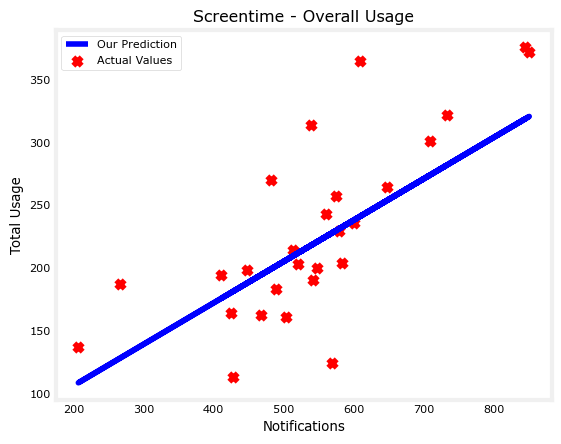

In [52]:


# Plot our model prediction
plt.plot(x, f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x,y, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Screentime - Overall Usage")
plt.ylabel('Total Usage')
plt.xlabel('Notifications')
plt.legend()
plt.show()

In [112]:
def compute_gradient(x,y,w,b):
  """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
  Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
  """
    
  dj_dw = 0
  dj_db = 0

  m = len(x)



  for i in range(m):
    f_wb = w * x[i] + b
    dj_dw_i = (f_wb - y[i]) * x[i]
    dj_db_i = f_wb - y[i]
    dj_dw += dj_dw_i
    dj_db += dj_db_i
    
  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw,dj_db



In [113]:
compute_gradient(x,y,0,0)

(-131876.44444444444, -229.0)

In [114]:
def compute_gradientSimple(x,y,w,b):
  """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
  Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
  """
    
  dj_dw = 0
  dj_db = 0

  m = len(x)



  for i in range(m):
    f_wb = w * x[i] + b
    dj_dw += (f_wb - y[i]) * x[i]
    dj_db += f_wb - y[i]
    
  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw,dj_db



In [115]:
compute_gradientSimple(x,y,0,0)

(-131876.44444444444, -229.0)

In [116]:
compute_gradient(x,y,0,0) == compute_gradientSimple(x,y,0,0)

True

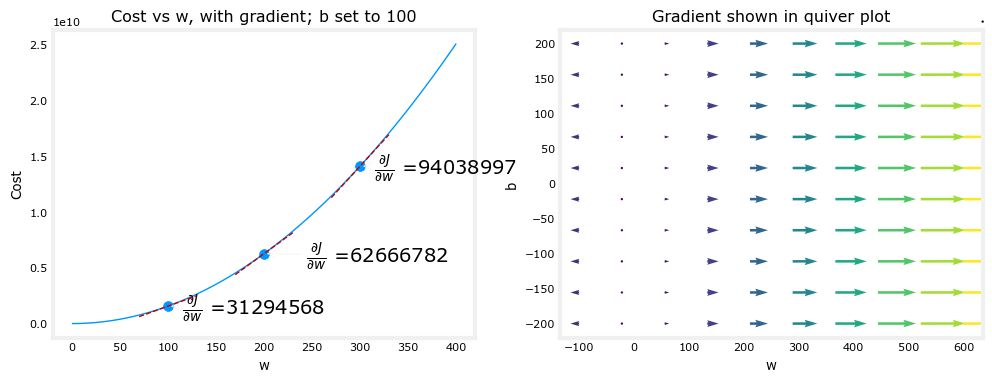

In [117]:
plt_gradients(x,y, compute_cost, compute_gradient)
plt.show()

In [118]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [126]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x ,y, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 2.73e+11  dj_dw: -1.319e+05, dj_db: -2.290e+02   w:  1.319e+03, b: 2.29000e+00
Iteration 1000: Cost nan  dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 2000: Cost nan  dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 3000: Cost nan  dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 4000: Cost nan  dj_dw:  nan, dj_db:  nan   w:  nan, b: nan


/var/folders/ty/qvj9919x6xd7qh3w_t73v_q80000gn/T/ipykernel_67666/586719361.py:9: RuntimeWarning: overflow encountered in double_scalars
  cost = cost + (f_wb - y[i])**2
/var/folders/ty/qvj9919x6xd7qh3w_t73v_q80000gn/T/ipykernel_67666/223600681.py:22: RuntimeWarning: overflow encountered in double_scalars
  dj_dw_i = (f_wb - y[i]) * x[i]
/var/folders/ty/qvj9919x6xd7qh3w_t73v_q80000gn/T/ipykernel_67666/1926063390.py:34: RuntimeWarning: invalid value encountered in double_scalars
  w = w - alpha * dj_dw


Iteration 5000: Cost nan  dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 6000: Cost nan  dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 7000: Cost nan  dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 8000: Cost nan  dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 9000: Cost nan  dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
(w,b) found by gradient descent: (     nan,     nan)


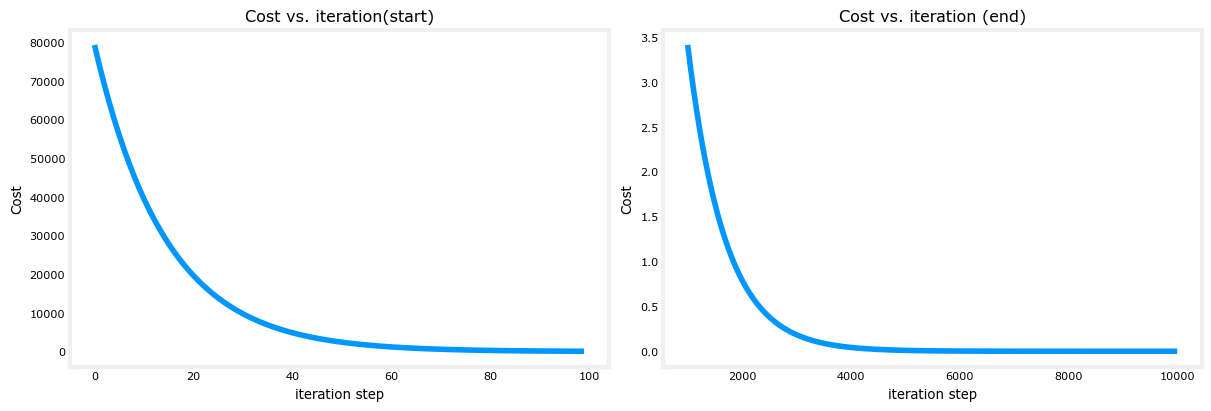

In [123]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

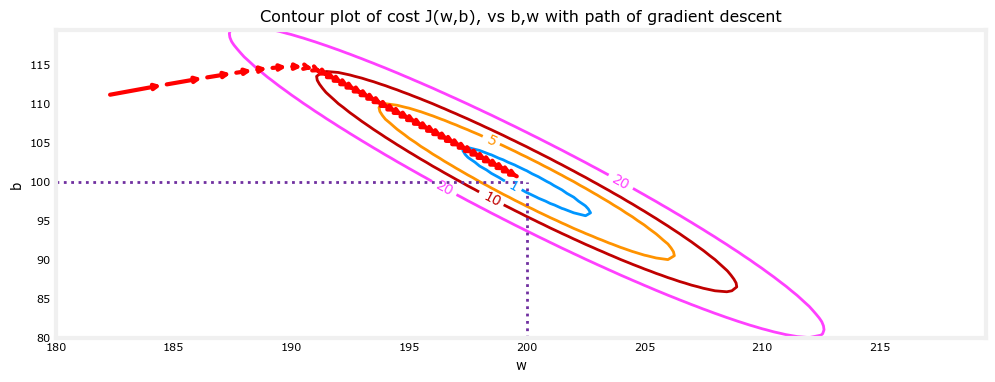

In [125]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)